In [1]:
import sys
sys.path.append('..')

import matplotlib.pyplot as plt
import MySignal as sig

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class StandardizedRollingGrowth(sig.Indicator):
    def __init__(self, series_names, weights_dict, n_periods=130):
        super(StandardizedRollingGrowth, self).__init__(series_names)
        self.weights_dict = weights_dict
        self.n_periods = n_periods

    def combine_series(self, series_up_to_date):
        weighted_values = {}
        for series_name in series_up_to_date.keys():
            weighted_values[series_name] = (self.weights_dict[series_name] *
                                            sig.standardize(series_up_to_date[series_name].pct_change().rolling(
                                                self.n_periods, self.n_periods).apply(lambda x: (1+x).prod()-1, raw=True)).iloc[-1])
        return sum(weighted_values.values()) / sum(self.weights_dict.values())

In [3]:
countries=['USA']
beg_date, end_date = ('1995-01-01', '2005-12-31')

inflation_indicator = StandardizedRollingGrowth(series_names=['CoreCPI/SA'],
                                          weights_dict={'CoreCPI/SA': 1})
inflation_signal = sig.SigmoidNormalizerSignal(indicators_dict={'inflation': inflation_indicator},
                                            weights_dict={'inflation': -1}, sigmoid_scaling_factor=2)

/Users/rogerio/.local/share/virtualenvs/Intership2020-c3F2SfGl/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


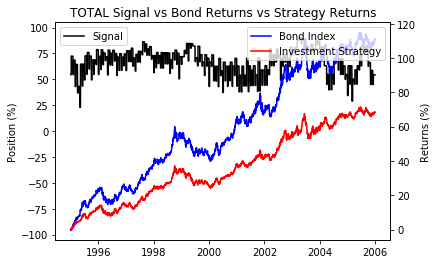

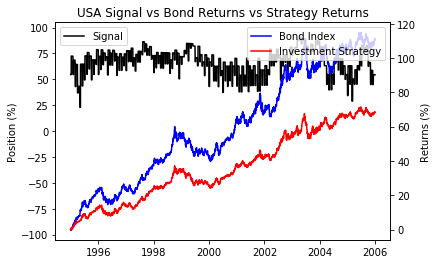

In [4]:
inflation_signal.plot_signal_index_returns(countries, beg_date, end_date)

In [5]:
inflation_signal.get_metrics(countries, beg_date, end_date)

,USA,TOTAL
Sharpe Ratio,-0.772394,-0.772394
Total Return (%),3.44251,3.44251
Excess Return (%),-0.959007,-0.959007
Maximum Drawdown (%),-9.4879,-9.4879
R-Squared,0.00318583,0.00318583
Volatility,1.2416,1.2416


In [6]:
countries=['USA']
beg_date, end_date = ('1995-01-01', '2005-12-31')

curve_height_indicator = StandardizedRollingGrowth(series_names=['CurveHeight'],
                                          weights_dict={'CurveHeight': 1})
curve_height_signal = sig.SigmoidNormalizerSignal(indicators_dict={'CurveHeight': curve_height_indicator},
                                            weights_dict={'CurveHeight': -1}, sigmoid_scaling_factor=1)

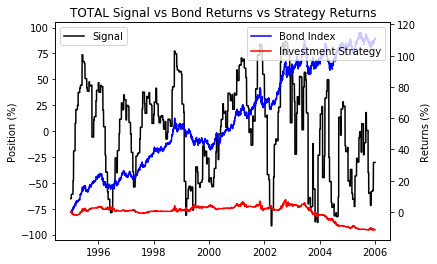

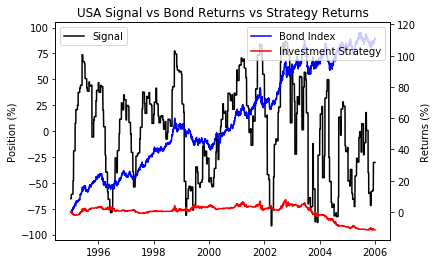

In [7]:
curve_height_signal.plot_signal_index_returns(countries, beg_date, end_date)

In [16]:
curve_height_signal.get_metrics(countries, beg_date, end_date)

,USA,TOTAL
Sharpe Ratio,-4.45608,-4.45608
Total Return (%),-0.781009,-0.781009
Excess Return (%),-5.00347,-5.00347
Maximum Drawdown (%),-17.9776,-17.9776
R-Squared,0.00287226,0.00287226
Volatility,1.12284,1.12284


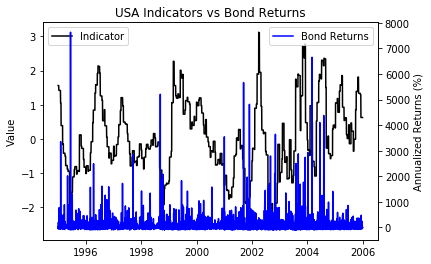

In [13]:
curve_height_indicator.plot_indicator_returns(countries, beg_date, end_date)